In [1]:
#!pip install missingno --user

In [ ]:
import missingno as msno
import pandas as pd

In [20]:
# Create a wider view for the notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [15]:
# These are cleaned data !!!
data = pd.read_feather("data/Virus_data.fr")


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82900 entries, 0 to 82899
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Submission Date                            82900 non-null  datetime64[ns]
 1   Last Update                                28776 non-null  datetime64[ns]
 2   Outbreak or sporadic case O/S              56752 non-null  object        
 3   Source of the sample                       79640 non-null  object        
 4   Specify source                             516 non-null    object        
 5   Specify animal                             92 non-null     object        
 6   Suspected country of infection             75908 non-null  object        
 7   Date of first disease                      42320 non-null  datetime64[ns]
 8   Geo-coded location                         78260 non-null  object        
 9   Suspected mode of

### We drop those columns that are complete

In [12]:
# we don't need those, which are complete columns
drop_cols = ['User', 'Institute', 'Database ID', 'Country', 'Submission Date',
       'Outbreak Nr', 'Sample Date',
       'fasta_id', 'Genus-Genogroup', 'ORF1',
       'ORF2']
data.drop(drop_cols, axis=1, inplace=True)

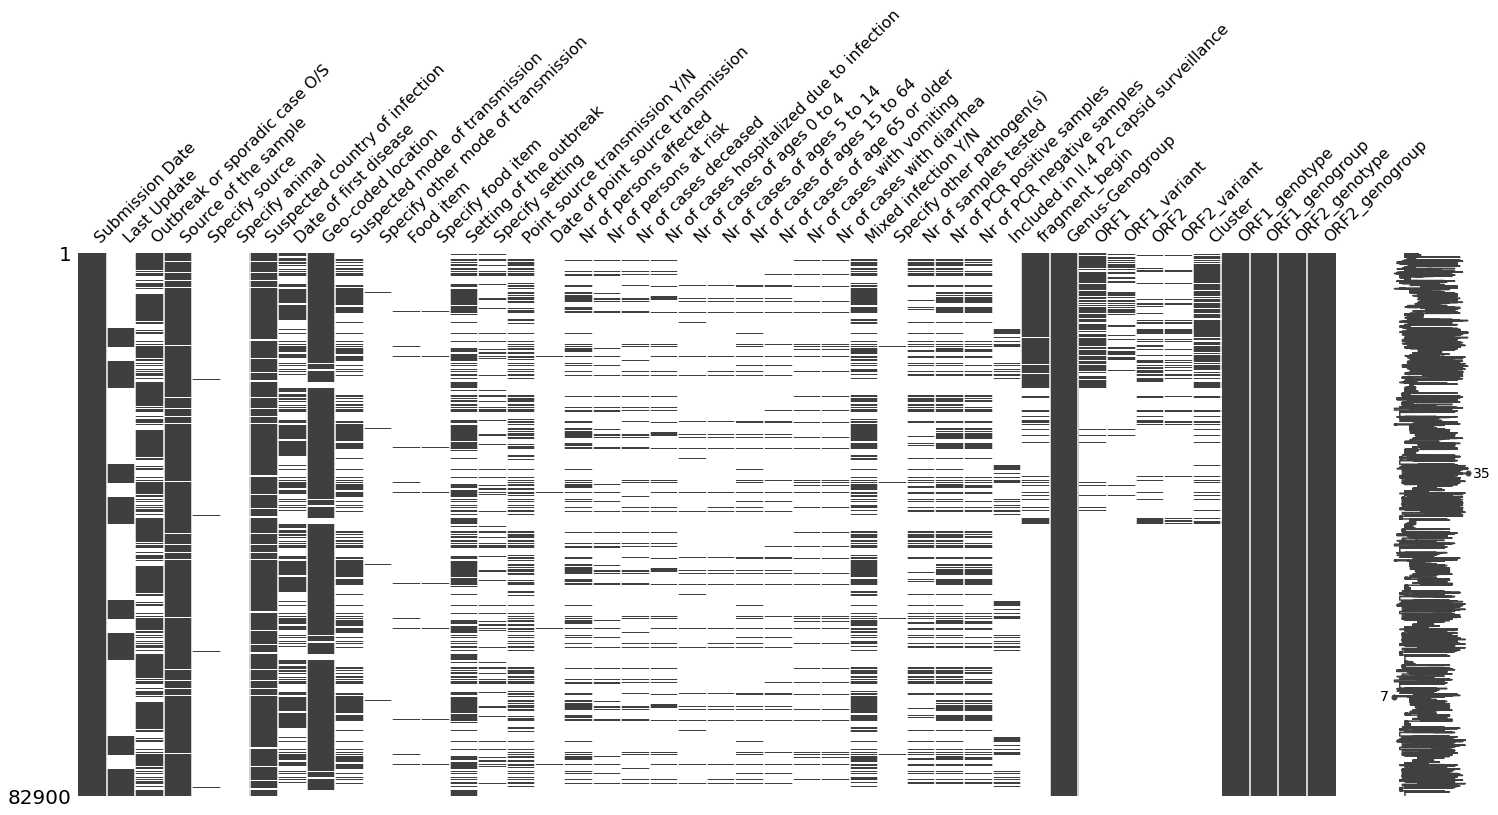

In [21]:
#msno.matrix(data.sample(250))
msno.matrix(data)

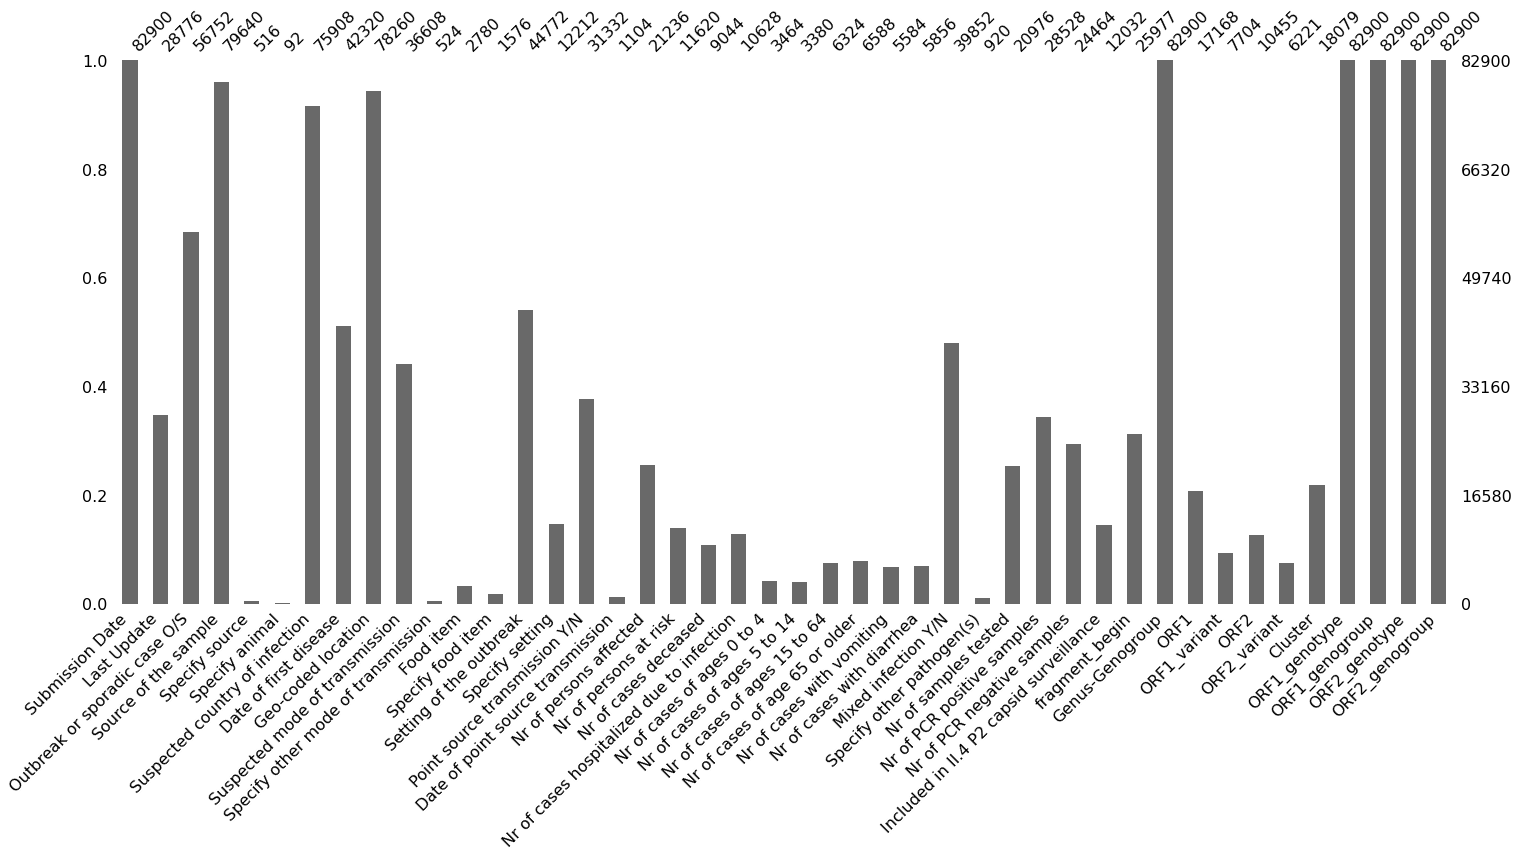

In [18]:
msno.bar(data)

## Nullity correlation 
* -1,  if one variable appears the other definitely does not
* 0, variables appearing or not appearing have no effect on one another
* 1, if one variable appears the other definitely also does

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

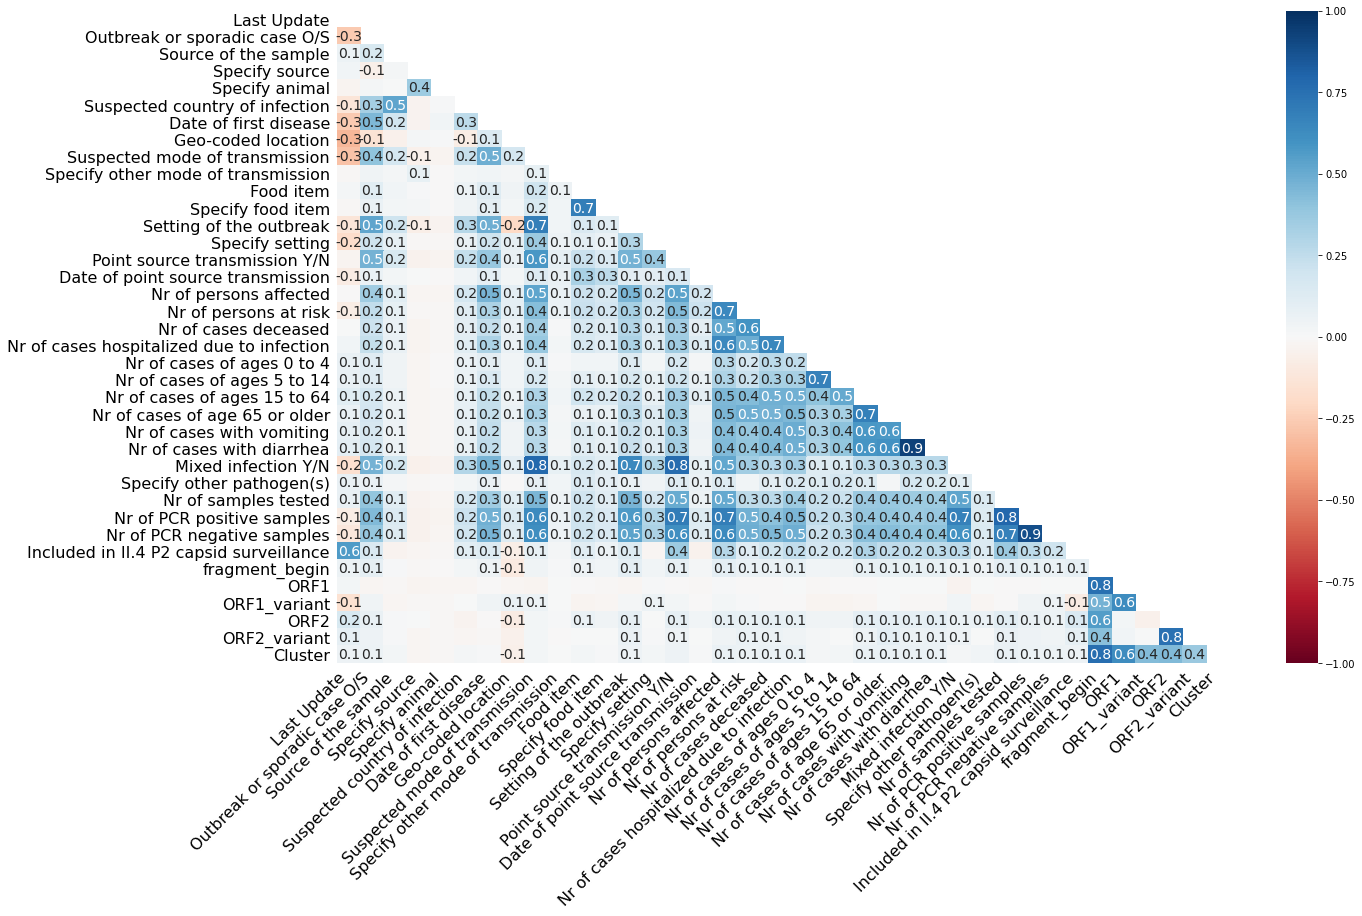

In [32]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# from matplotlib.pyplot import grid

# fig, ax = plt.subplots(figsize=(20,12))
msno.heatmap(data)#.sample(100), ax=ax)
# ax.grid(color='r', linestyle='-', linewidth=2)
# ax.grid(True)#, markevery=0)
# ax.figure.figsize=(28,16)


### Dendrogram
The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

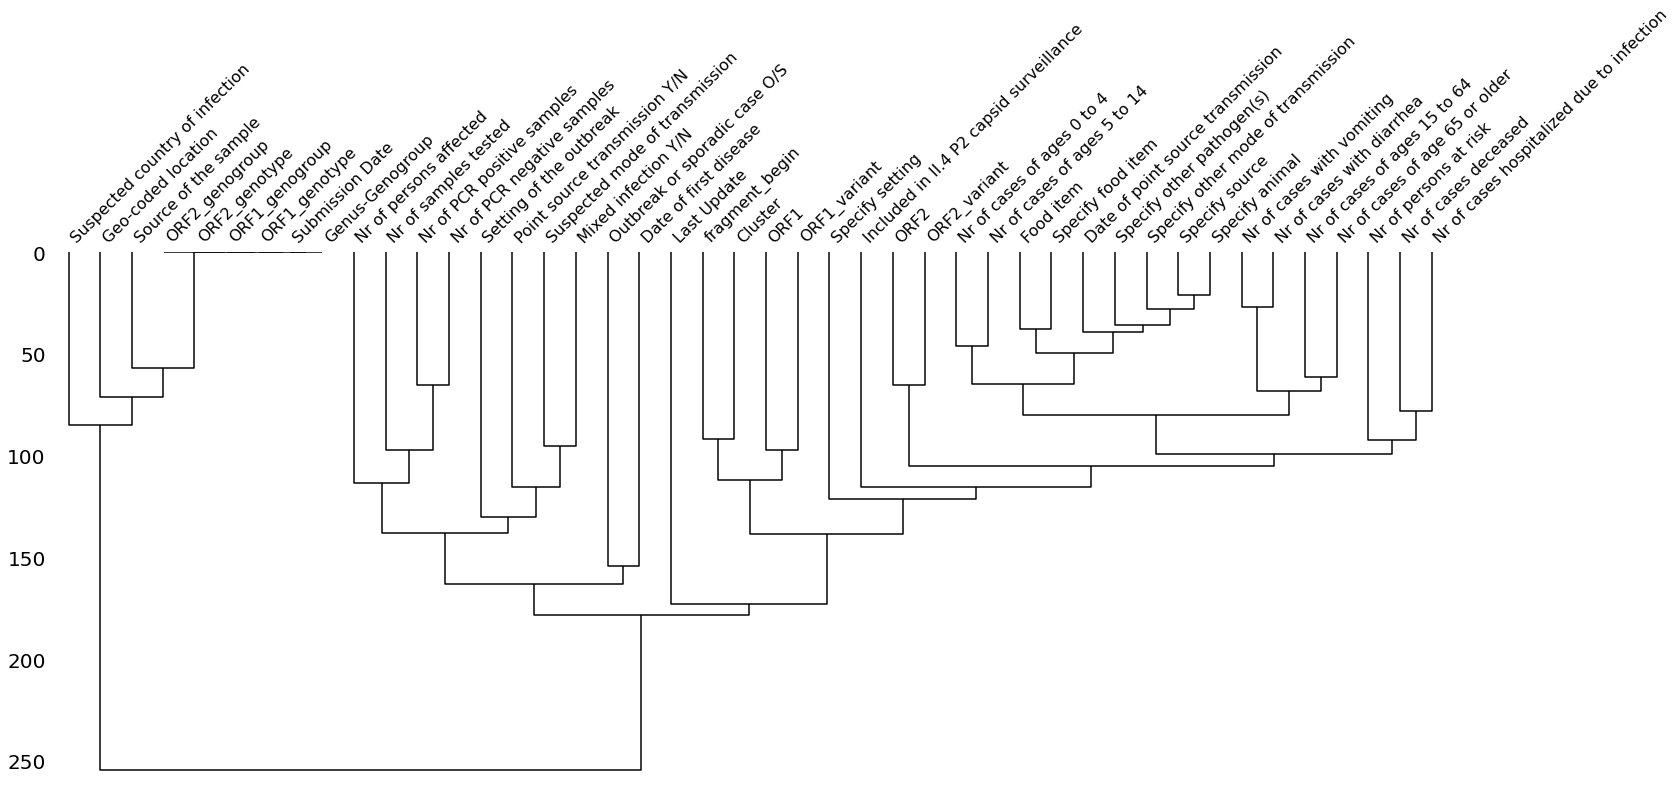

In [33]:
msno.dendrogram(data)

Citation

You may cite this package using the following format (via this paper):

    Bilogur, (2018). Missingno: a missing data visualization suite. Journal of Open Source Software, 3(22), 547, https://doi.org/10.21105/joss.00547
